<a href="https://colab.research.google.com/github/kartik-karira/TF_IDF-BOW/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP Sentimnet Analysis using Scikit Learn on CorornaVirus Dataset**

 **Importing the libraries**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [ ]:
# Importing the dataset
dataset = pd.read_csv('tweets_tagged.csv')
dataset

,Sr No,tweet,label
0,1,Hysteria surrounding #coronavirus NZ daycare r...,3
1,2,Thank you @TheOnion for dragging all of us und...,1
2,3,#avetmissdone is catching on faster than the #...,1
3,4,They just said #Tonysnell was back from the fl...,2
4,5,Forget locking them up on an island to die slo...,2
...,...,...,...
9995,9996,January/04/20 #TuesdayThoughts ÒThe time is no...,1
9996,9997,Nobody can stop reggae ?? \n#CoronavirusOutbre...,3
9997,9998,?? Be careful where you get your news about #c...,1
9998,9999,"Today, @HHSgov took another important step in ...",1


**Visualisation of Data**

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


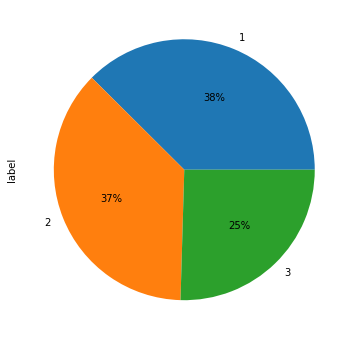

In [ ]:
dataset.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

**Cleaning**

In [ ]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 10000):
  tweet = re.sub('[^a-zA-Z]', ' ', dataset['tweet'][i])
  tweet = tweet.lower()
  tweet = tweet.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords)]
  tweet = ' '.join(tweet)
  corpus.append(tweet)
Corpus=corpus
print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['hysteria surround coronaviru nz daycar request children visit countri confirm case exclud week includ australia despit us visit adelaid confirm case categori', 'thank theonion drag us art guis satir v help coronaviru advic http co oli sul f', 'avetmissdon catch faster coronaviru death yet', 'said tonysnel back flu said shot like coronaviru', 'forget lock island die slowli jessica solut coronaviru', 'pleas keep post coronaviru gensan stelizabethhospitalinc sehi http co fx cfwt', 'richard jefferson say coronaviru http co kyw dski w', 'coronaviru say ni hao get sick quarantin coronaviru http co afh yvb bw', 'halt commerci flight china usa coronaviru', 'break updat coronaviru infect suspect case dead seriou condit increas infect peopl sinc last week not quarantin flight china yet spread fast', 'wuhancoronaviru coronaviru young man recov discharg local hospit shanxi best wish htt

In [ ]:
print(corpus)

['hysteria surround coronaviru nz daycar request children visit countri confirm case exclud week includ australia despit us visit adelaid confirm case categori', 'thank theonion drag us art guis satir v help coronaviru advic http co oli sul f', 'avetmissdon catch faster coronaviru death yet', 'said tonysnel back flu said shot like coronaviru', 'forget lock island die slowli jessica solut coronaviru', 'pleas keep post coronaviru gensan stelizabethhospitalinc sehi http co fx cfwt', 'richard jefferson say coronaviru http co kyw dski w', 'coronaviru say ni hao get sick quarantin coronaviru http co afh yvb bw', 'halt commerci flight china usa coronaviru', 'break updat coronaviru infect suspect case dead seriou condit increas infect peopl sinc last week not quarantin flight china yet spread fast', 'wuhancoronaviru coronaviru young man recov discharg local hospit shanxi best wish http co cpnhirro w', 'wuhancoronaviru coronaviru young man recov discharg local hospit shanxi best wish http co vx

**Bag Of Word**

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000,ngram_range=(2,2))
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values


In [ ]:
print(cv)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [ ]:
print(len(X))

10000


In [ ]:
X=np.array(X)
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Encoding the Dependent Variable
y = dataset.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
yt=y
print(y)

[2 0 0 ... 0 0 2]


In [ ]:
print(len(y))

10000


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 2 1 ... 1 0 1]
[0 0 0 ... 0 1 0]


**TF-IDF**

In [ ]:
# Creating the TF_IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=10000)
x = tv.fit_transform(Corpus).toarray()


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, yt_train, yt_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x_train,'\n', x_test,'\n', yt_train,'\n', yt_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 [1 2 1 ... 1 0 1] 
 [0 0 0 ... 0 1 0]


**IMPLEMENTATION OF DIFFERENT CLASSIFIER**

**Naive Baiyes**

**Naive Baiyes BOW set**

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [2 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[301 115 339]
 [188 175 320]
 [149 118 295]]


0.3855

In [ ]:
accuracy_naive_bow=.3855
accuracy_naive_bow

0.3855

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.47      0.40      0.43       755
           1       0.43      0.26      0.32       683
           2       0.31      0.52      0.39       562

    accuracy                           0.39      2000
   macro avg       0.40      0.39      0.38      2000
weighted avg       0.41      0.39      0.38      2000



**Naive Bayes TF-IDF**

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, yt_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

[[2 0]
 [0 0]
 [1 0]
 ...
 [1 0]
 [1 1]
 [1 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_naive_tf=accuracy_score(yt_test, yt_pred)
accuracy_naive_tf

[[194 133 428]
 [156 147 380]
 [123 104 335]]


0.338

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.41      0.26      0.32       755
           1       0.38      0.22      0.28       683
           2       0.29      0.60      0.39       562

    accuracy                           0.34      2000
   macro avg       0.36      0.36      0.33      2000
weighted avg       0.37      0.34      0.32      2000



**Random Forest BOW set**

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 0]
 [0 0]
 [1 0]
 ...
 [1 0]
 [2 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[356 277 122]
 [239 318 126]
 [195 216 151]]


0.4125

In [ ]:
accuracy_rf_bow=0.4125

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.45      0.47      0.46       755
           1       0.39      0.47      0.43       683
           2       0.38      0.27      0.31       562

    accuracy                           0.41      2000
   macro avg       0.41      0.40      0.40      2000
weighted avg       0.41      0.41      0.41      2000



**Random Forest TF_IDF**

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, yt_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

[[1 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [2 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_rf_tf=accuracy_score(yt_test, yt_pred)
accuracy_rf_tf

[[381 306  68]
 [265 334  84]
 [227 249  86]]


0.4005

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.50      0.47       755
           1       0.38      0.49      0.42       683
           2       0.36      0.15      0.21       562

    accuracy                           0.40      2000
   macro avg       0.39      0.38      0.37      2000
weighted avg       0.39      0.40      0.38      2000



**Logistic Regression BOW**

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0]
 [0 0]
 [1 0]
 ...
 [1 0]
 [1 1]
 [0 0]]
[[371 290  94]
 [240 338 105]
 [190 258 114]]


0.4115

In [ ]:
accuracy_lr_bow=0.4115

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.49      0.48       755
           1       0.38      0.49      0.43       683
           2       0.36      0.20      0.26       562

    accuracy                           0.41      2000
   macro avg       0.40      0.40      0.39      2000
weighted avg       0.41      0.41      0.40      2000



**Logistic Regression TF_IDF**

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, yt_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

[[1 0]
 [0 0]
 [1 0]
 ...
 [1 0]
 [2 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_lr_tf=accuracy_score(yt_test, yt_pred)
accuracy_lr_tf

[[397 288  70]
 [233 370  80]
 [211 260  91]]


0.429

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       755
           1       0.40      0.54      0.46       683
           2       0.38      0.16      0.23       562

    accuracy                           0.43      2000
   macro avg       0.42      0.41      0.40      2000
weighted avg       0.42      0.43      0.41      2000



**KNN BOW**

In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [2 1]
 [1 0]]
[[382 289  84]
 [324 265  94]
 [289 181  92]]


0.3695

In [ ]:
accuracy_knn_bow=0.3695

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.38      0.51      0.44       755
           1       0.36      0.39      0.37       683
           2       0.34      0.16      0.22       562

    accuracy                           0.37      2000
   macro avg       0.36      0.35      0.34      2000
weighted avg       0.36      0.37      0.35      2000



**KNN TF_IDF**

In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, yt_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_knn_tf=accuracy_score(yt_test, yt_pred)
accuracy_knn_tf

[[424 261  70]
 [297 295  91]
 [265 209  88]]


0.4035

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.56      0.49       755
           1       0.39      0.43      0.41       683
           2       0.35      0.16      0.22       562

    accuracy                           0.40      2000
   macro avg       0.39      0.38      0.37      2000
weighted avg       0.39      0.40      0.38      2000



**Decision Tree information gain BOW**

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0]
 [2 0]
 [1 0]
 ...
 [1 0]
 [2 1]
 [0 0]]
[[341 273 141]
 [239 291 153]
 [192 208 162]]


0.397

In [ ]:
accuracy_dt_bow=0.397

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.45      0.45       755
           1       0.38      0.43      0.40       683
           2       0.36      0.29      0.32       562

    accuracy                           0.40      2000
   macro avg       0.39      0.39      0.39      2000
weighted avg       0.40      0.40      0.39      2000



**Decision Tree information gain TF_IDF**

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, yt_train)


In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

[[2 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [2 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_dt_tf=accuracy_score(yt_test, yt_pred)
accuracy_dt_tf

[[357 259 139]
 [258 290 135]
 [214 197 151]]


0.399

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       755
           1       0.39      0.42      0.41       683
           2       0.36      0.27      0.31       562

    accuracy                           0.40      2000
   macro avg       0.39      0.39      0.39      2000
weighted avg       0.40      0.40      0.39      2000



**Decision Tree Gini BOW**

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 0]
 [2 0]
 [1 0]
 ...
 [1 0]
 [2 1]
 [1 0]]
[[338 276 141]
 [247 295 141]
 [199 205 158]]


0.3955

In [ ]:
accuracy_dt_gi_bow=0.3955

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.45      0.44       755
           1       0.38      0.43      0.40       683
           2       0.36      0.28      0.32       562

    accuracy                           0.40      2000
   macro avg       0.39      0.39      0.39      2000
weighted avg       0.39      0.40      0.39      2000



**Decision Tree Gini TF_IDF**

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(x_train, yt_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [1 0]
 [2 1]
 [2 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_dt_gi_tf=accuracy_score(yt_test, yt_pred)
accuracy_dt_gi_tf

[[350 244 161]
 [215 314 154]
 [185 226 151]]


0.4075

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.47      0.46      0.47       755
           1       0.40      0.46      0.43       683
           2       0.32      0.27      0.29       562

    accuracy                           0.41      2000
   macro avg       0.40      0.40      0.40      2000
weighted avg       0.40      0.41      0.40      2000



**SVM BOW**

In [ ]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0]
 [0 0]
 [1 0]
 ...
 [1 0]
 [1 1]
 [0 0]]
[[363 290 102]
 [249 325 109]
 [201 244 117]]


0.4025

In [ ]:
accuracy_svm_bow=0.4025

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.45      0.48      0.46       755
           1       0.38      0.48      0.42       683
           2       0.36      0.21      0.26       562

    accuracy                           0.40      2000
   macro avg       0.39      0.39      0.38      2000
weighted avg       0.40      0.40      0.39      2000



**SVM TF_IDF**

In [ ]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, yt_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

[[1 0]
 [0 0]
 [1 0]
 ...
 [1 0]
 [2 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_svm_tf=accuracy_score(yt_test, yt_pred)
accuracy_svm_tf

[[392 296  67]
 [238 379  66]
 [216 259  87]]


0.429

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.52      0.49       755
           1       0.41      0.55      0.47       683
           2       0.40      0.15      0.22       562

    accuracy                           0.43      2000
   macro avg       0.42      0.41      0.39      2000
weighted avg       0.42      0.43      0.41      2000



**Gradient Boosting in BOW**

In [ ]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier= GradientBoostingClassifier(n_estimators=100, learning_rate = 0.75, random_state = 0)
classifier.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_gb_bow=accuracy_score(y_test, y_pred)
accuracy_gb_bow

[[0 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 1]
 [1 0]]
[[ 10 739   6]
 [ 10 669   4]
 [  8 545   9]]


0.344

In [ ]:
accuracy_gb_bow=0.344

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.36      0.01      0.03       755
           1       0.34      0.98      0.51       683
           2       0.47      0.02      0.03       562

    accuracy                           0.34      2000
   macro avg       0.39      0.34      0.19      2000
weighted avg       0.38      0.34      0.19      2000



**Gradient Boosting in TF_IDF**

In [ ]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier= GradientBoostingClassifier(n_estimators=100, learning_rate = 0.75, random_state = 0)
classifier.fit(x_train, yt_train)

In [ ]:
# Predicting the Test set results
yt_pred = classifier.predict(x_test)
print(np.concatenate((yt_pred.reshape(len(yt_pred),1), yt_test.reshape(len(yt_test),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(yt_test, yt_pred)
print(cm)
accuracy_gb_tf=accuracy_score(yt_test, yt_pred)
accuracy_gb_tf

[[350 244 161]
 [215 314 154]
 [185 226 151]]


0.4075

In [ ]:
print("Classification Report")
print(classification_report(yt_test, yt_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.47      0.46      0.47       755
           1       0.40      0.46      0.43       683
           2       0.32      0.27      0.29       562

    accuracy                           0.41      2000
   macro avg       0.40      0.40      0.40      2000
weighted avg       0.40      0.41      0.40      2000



**Tabular Comparasion of accuracies in diffent classifier**

In [ ]:
import tabulate
from tabulate import tabulate
table = [['classification Algorithm',  'Accuracy in BOW',  'Accuracy in TF_IDF'],['gradient boosting', accuracy_gb_bow, accuracy_gb_tf], ['Random Forest ', accuracy_rf_bow ,accuracy_rf_tf], ['KNN', accuracy_knn_bow ,accuracy_knn_tf],  ['Decision Tree',accuracy_dt_bow ,accuracy_dt_tf],['Decision Tree Gini Index',accuracy_dt_gi_bow ,accuracy_dt_gi_tf], ['Logistic Regresion', accuracy_lr_bow ,accuracy_lr_tf],['Naive Bayes', accuracy_naive_bow ,accuracy_naive_tf],['SVM', accuracy_svm_bow ,accuracy_svm_tf]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════╤═══════════════════╤══════════════════════╕
│ classification Algorithm   │   Accuracy in BOW │   Accuracy in TF_IDF │
╞════════════════════════════╪═══════════════════╪══════════════════════╡
│ gradient boosting          │            0.344  │               0.4075 │
├────────────────────────────┼───────────────────┼──────────────────────┤
│ Random Forest              │            0.4125 │               0.4005 │
├────────────────────────────┼───────────────────┼──────────────────────┤
│ KNN                        │            0.3695 │               0.4035 │
├────────────────────────────┼───────────────────┼──────────────────────┤
│ Decision Tree              │            0.397  │               0.399  │
├────────────────────────────┼───────────────────┼──────────────────────┤
│ Decision Tree Gini Index   │            0.3955 │               0.4075 │
├────────────────────────────┼───────────────────┼──────────────────────┤
│ Logistic Regresion         │        

**Graphical Comparasion Comparasion of accuracies in different classifier**

In [ ]:
x = ['gradient boosting','Random Forest','KNN','SVM','Logistic Regression ','Naive Bayes','Decission Tree IF','Decission Tree GI']
y = [accuracy_gb_bow,accuracy_rf_bow,accuracy_knn_bow,accuracy_svm_bow,accuracy_lr_bow,accuracy_naive_bow,accuracy_dt_bow,accuracy_dt_gi_bow]
z = [accuracy_gb_tf,accuracy_rf_tf,accuracy_knn_tf,accuracy_svm_tf,accuracy_lr_tf,accuracy_naive_tf,accuracy_dt_tf,accuracy_dt_gi_tf]

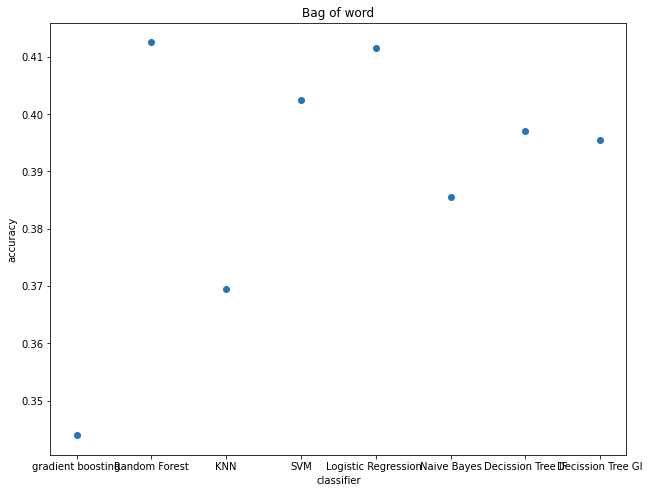

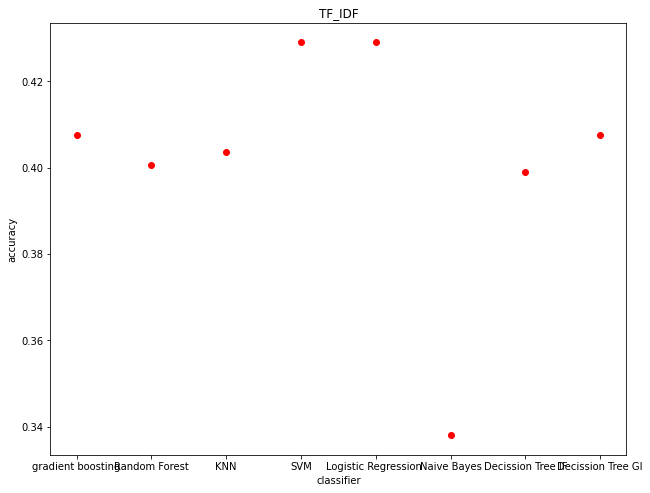

In [ ]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('classifier')
ax.set_ylabel('accuracy')
ax.set_title('Bag of word')
plt.scatter(x, y)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('classifier')
ax.set_ylabel('accuracy')
ax.set_title('TF_IDF')
plt.scatter(x,z,color="red")
plt.show()


**THANK YOU**